In [1]:
#Chargement des bibliothèques nécessaire au nettoyage du Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
#chargement du dataset 
#dataF = pd.read_csv("../DataSet/en.openfoodfacts.org.products.csv", sep="\t", decimal=".")
dataF = pd.read_csv("../DataSet/cleaned_en.openfoodfacts.org.products.csv", sep=";", decimal=",")

/Users/benjamindeplus/.local/share/virtualenvs/OpenFoodFact-L12SYMG1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9,13,19,20,21,29,30,36,37,38,39,40,41,44,46,47,48,51,53,54,56,63,75,78,79,80,81,82,83,84,85,86,87,88,89,90,91,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,114,115,116,117,118,119,123,124,126,127,128,133,135,136,141,143,144,145,146,147,148,150,152,154,155,156,157,158,159,160,161,162,163,164,165,167,169,171,172,176,178,179,180,181,182) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Etude de la taille du dataset
Environ **1.5m** de lignes et **183 colonnes**

In [3]:
dataF.shape
#the data set is 1.5m rows and 180 columns

(1449815, 183)

### Etape de listing des colonnes qui ne sont pas **"populated"**

empty_cols = [col for col in dataF.columns if dataF[col].isnull().all()]

Nous créons une liste de colonne integralement vide avec la boucle ci-dessus

In [28]:
#pour limiter la taille des colonnes nous allons obserbé si certains sont vides. 
#on peut observer le phenomène visuellement
#sns.heatmap(dataF.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#ou plus rapide récuperer les colonnes vides à l'aide d'une simple boucle sur le dataframe

#dataF = dataF.fillna()

empty_cols = [col for col in dataF.columns if dataF[col].isnull().all()]
#Nan_cols = [col for col in dataF.columns if dataF[col].isna()]
#print("Nom des colonnes vides", empty_cols)
#print("Nombre de colonnes vides", len(empty_cols))

#print(dataF["manganese_100g"].isna().all())
#print(dataF["manganese_100g"].describe())
#print("Nom des colonnes NaN", Nan_cols)

#print("Nombre de colonnes NaN", len(Nan_cols))
#on enlève les colonnes concernés du dataframe
dataF = dataF.drop(columns=list(empty_cols)).sort_index()

print("Nombre de lignes:", dataF.shape[0], "Nombre de colonnes", dataF.shape[1])

Nombre de lignes: 1449815 Nombre de colonnes 180


Nom des colonnes vides ['ingredients_from_palm_oil', 'nutrition-score-uk_100g', 'water-hardness_100g']
<br/>Nombre de colonnes vides 3

### Après cette étape le dataset à la forme suivant

Nombre de lignes: 1449815 Nombre de colonnes 180

## Etape de visualisation des données 
Nous alons créé un dataframe composé: 
- du nom des colonnes du dataset 
- du taux de remplissage pour cette colonne

In [29]:
#evaluate if columns are filled with data or not
nonNullRate = []
for col in dataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "rate": round((dataF[col].count()/dataF.shape[0])*100, 3)})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["rate"] < 5]
lessThanOnePercentColumns.describe
len(list(lessThanOnePercentColumns["columns"]))

104

104 colonnes sont populated à moins de 5%

### Limiter les dimensions ayant moins de 5% des lignes populated

Nous effectuons un filtre sur le dataset à l'aide de la list 'filtre' créée à l'étape précédente

In [44]:
#list of columns with less than 5% of rows filled
#list(lessThanOnePercentColumns["columns"])
#kill this list of orphane data
cleanDF = dataF.drop(columns=list(lessThanOnePercentColumns["columns"]))

In [45]:
#we just have 66 columns left and 30 with substancial data
cleanDF.shape

(1449815, 76)

### Le dataset passe alors à 76 dimensions toujours sur 1.5m de lignes

Plusieurs colonnes semblent avoir la même utilité.
<br/>
Pour limiter la taille du dataset nous allons cleanés les informations dupliqués 

In [46]:
#Plusieurs colonnes semblent avoir la même utilité.
#Pour limiter la taille du dataset nous allons cleanés les informations dupliqués 
#created_t, last_modified_t sont des timestamp de leurs homologues voisines qui sont en datetime
#d'autres colonnes sont integralement vide comme additives ingredients_from_palm_oil
cleanDF = cleanDF.drop(columns=["created_t", "last_modified_t"])

In [47]:
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449815 entries, 0 to 1449814
Data columns (total 74 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   code                                     1447670 non-null  float64
 1   url                                      1449815 non-null  object 
 2   creator                                  1449811 non-null  object 
 3   created_datetime                         1449815 non-null  object 
 4   last_modified_datetime                   1449815 non-null  object 
 5   product_name                             1383611 non-null  object 
 6   generic_name                             87086 non-null    object 
 7   quantity                                 356388 non-null   object 
 8   packaging                                216535 non-null   object 
 9   packaging_tags                           216509 non-null   object 
 10  brands            

<AxesSubplot:>

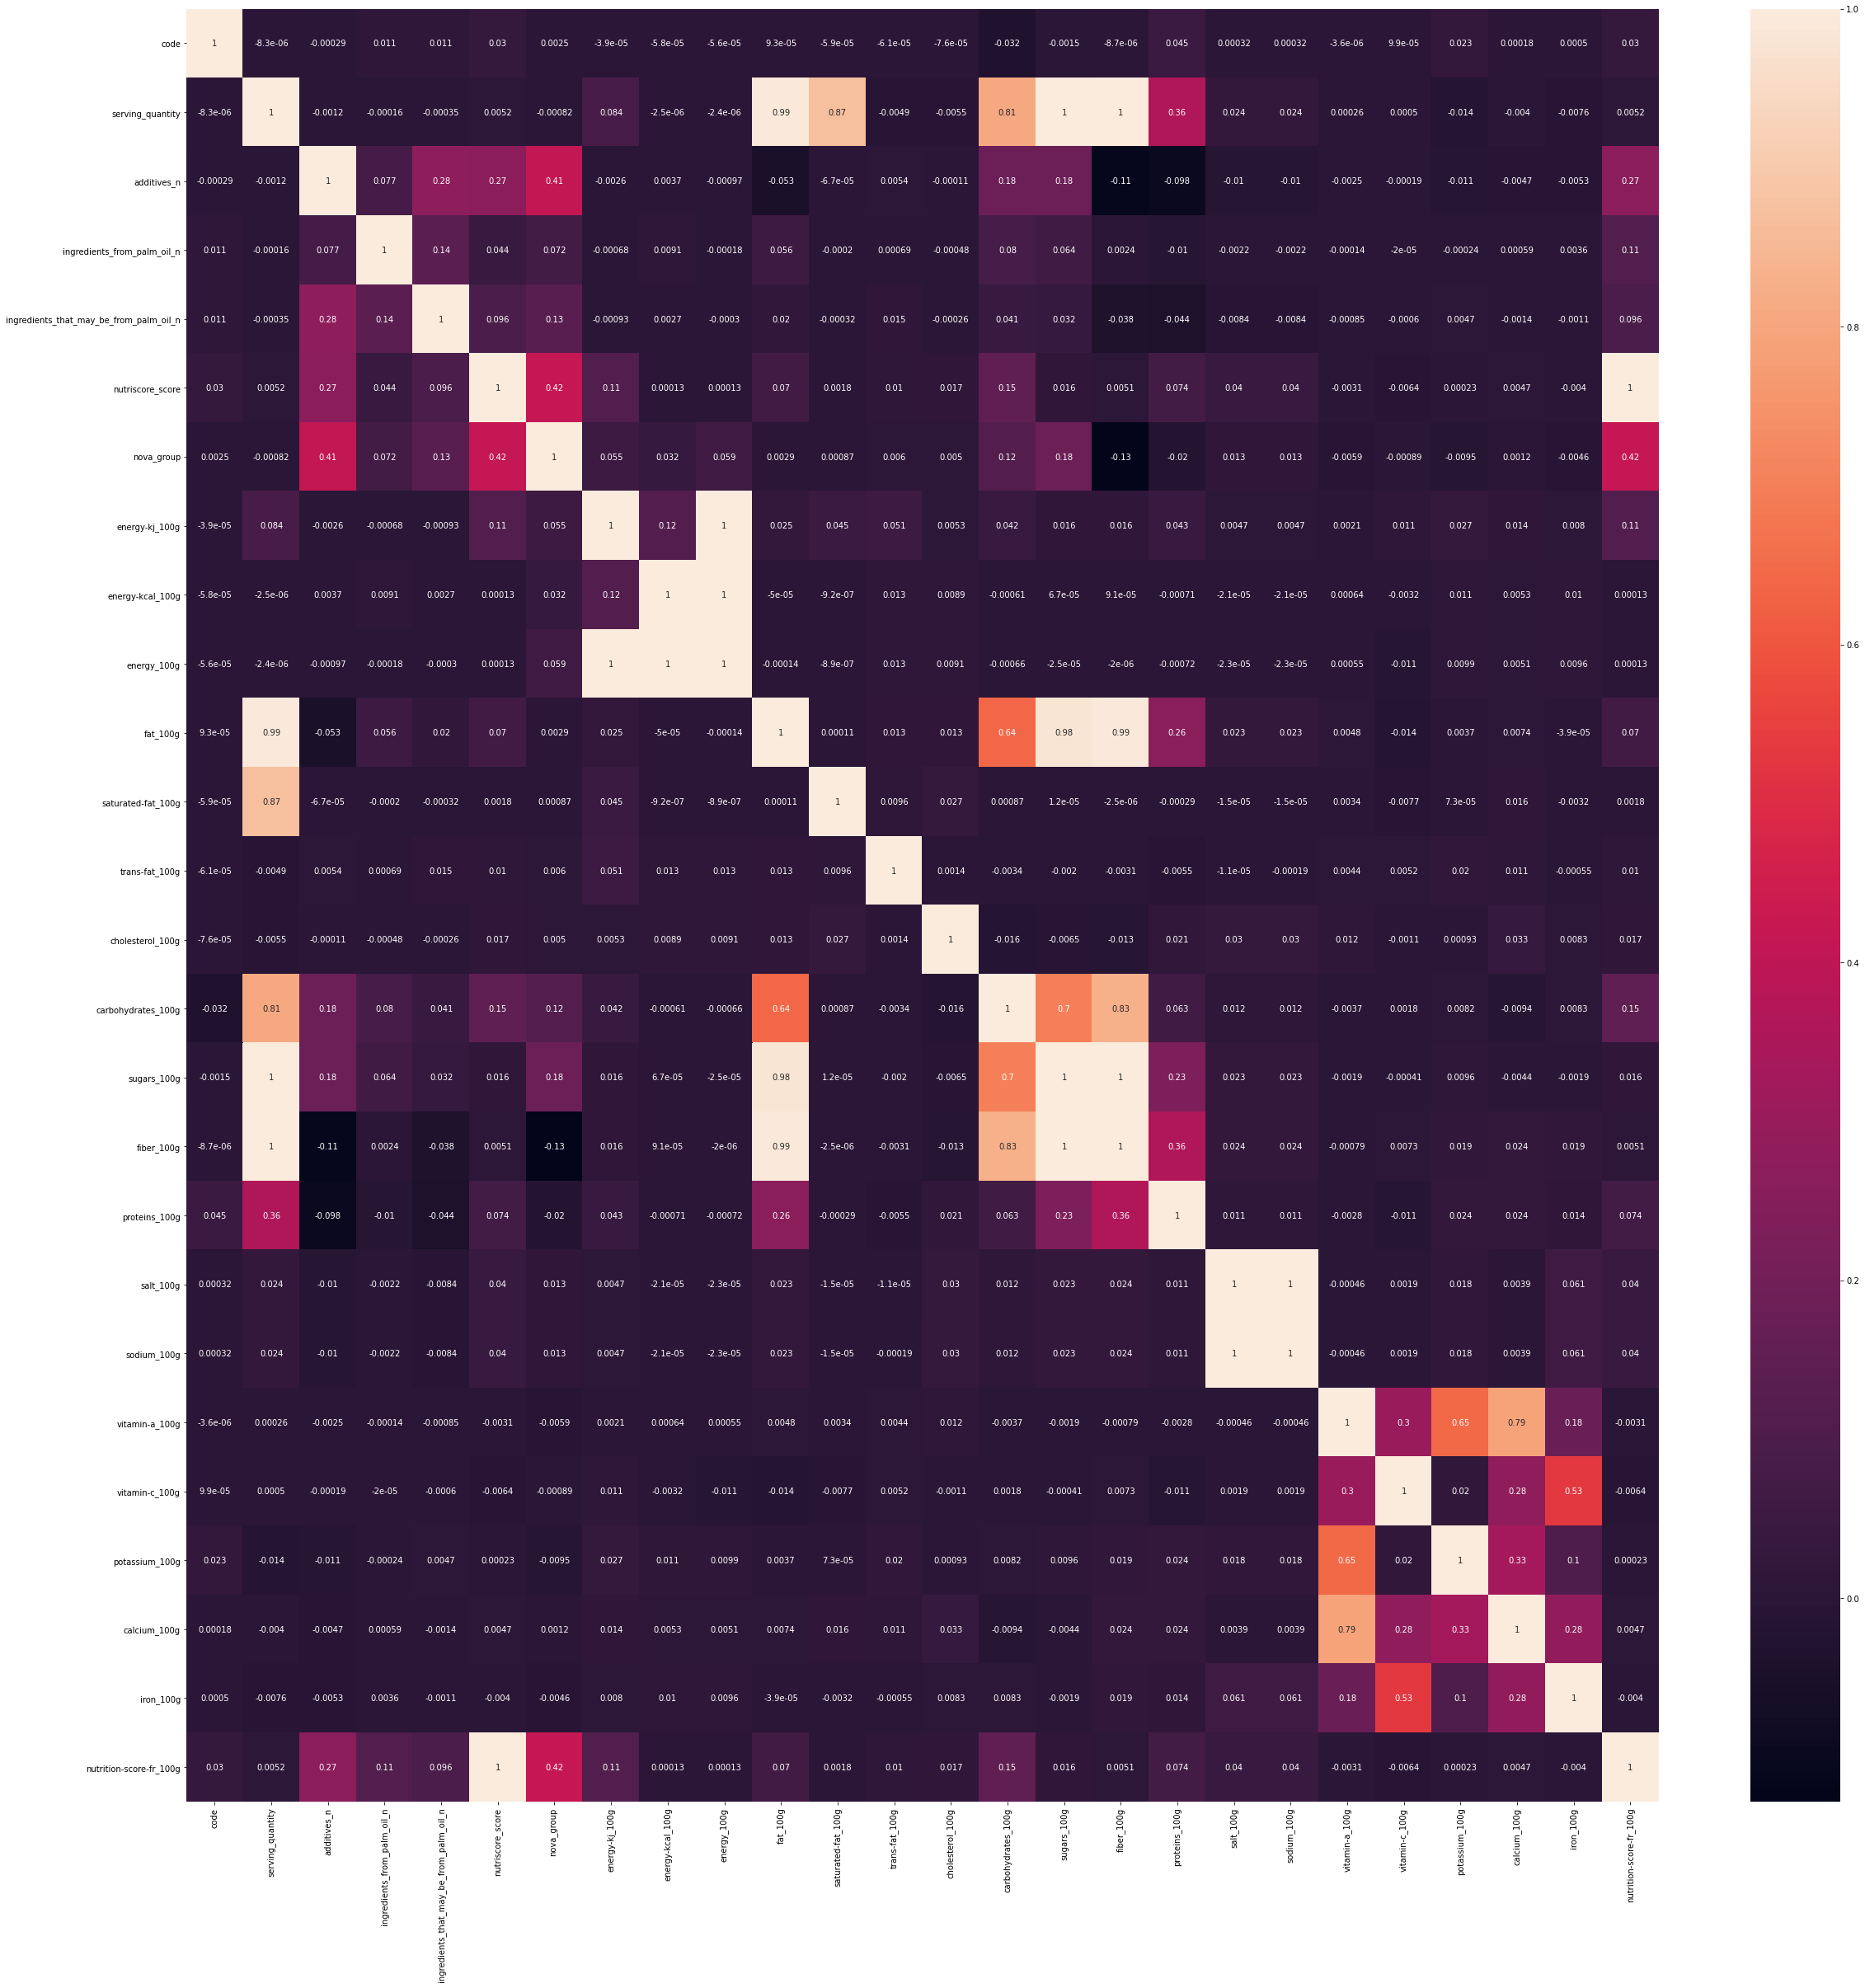

In [48]:
#check correlations 
correlations = cleanDF.corr()
f, ax = plt.subplots(figsize = (40, 40))
sns.heatmap(correlations, annot = True)

In [49]:
#idea recalculate a nutriscore grade from brand with OneHotEncoder and nutritions cars
#pnns_groups_1 and pnns_groups_2 classifier 
#toFocusOnColumns
#sns.pairplot(cleanDF, height=5)

In [50]:
#on the contrary let's have a look for very filled column but with limitated values 
#cleanDF.describe
#low distributed columns but highly filled
nbValues = []
filledRatio = []
columns = []
ColumnsFilledRatio = pd.DataFrame(columns=list(cleanDF.columns), index=["nbValues", "filledRatio"])
for col in cleanDF.columns: 
    columns.append({"column": col, "nbValues": cleanDF[col].nunique(), "type": str(cleanDF[col].dtypes),"filledRatio": round((cleanDF[col].count()/cleanDF.shape[0])*100, 3)})
    nbValues.append(cleanDF[col].nunique())
    filledRatio.append(round((cleanDF[col].count()/cleanDF.shape[0])*100, 3))
ColumnsFilledRatio.append(nbValues)
ColumnsFilledRatio.append(filledRatio)
ColumnsFilledRatio
ColumnsFilledRatioFrame = pd.DataFrame(columns)    
#lets Keep Column filled with less than 50 different values 
#toFocusOnColumns = ColumnsFilledRatio[ColumnsFilledRatio["nbValues"] < 100]
#toFocusOnColumns
#toFocusOnColumns = ColumnsFilledRatio[ColumnsFilledRatio.index.isin(100)]

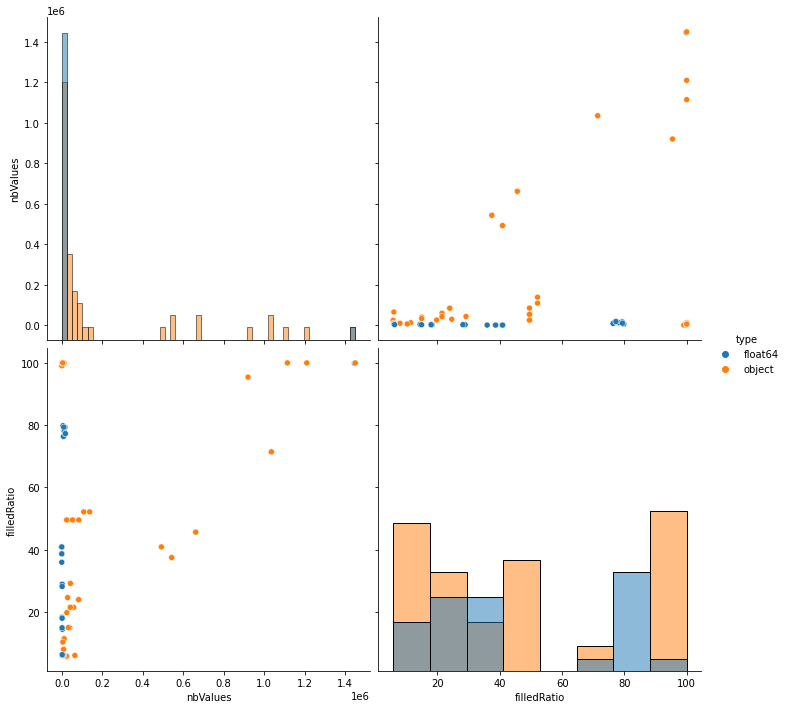

In [38]:
#ColumnsFilledRatioFrame["nbValues"].dtypes
#sns.pairplot(ColumnsFilledRatio, height=5)
sns.pairplot(ColumnsFilledRatioFrame, hue="type", height=5, diag_kind="hist")

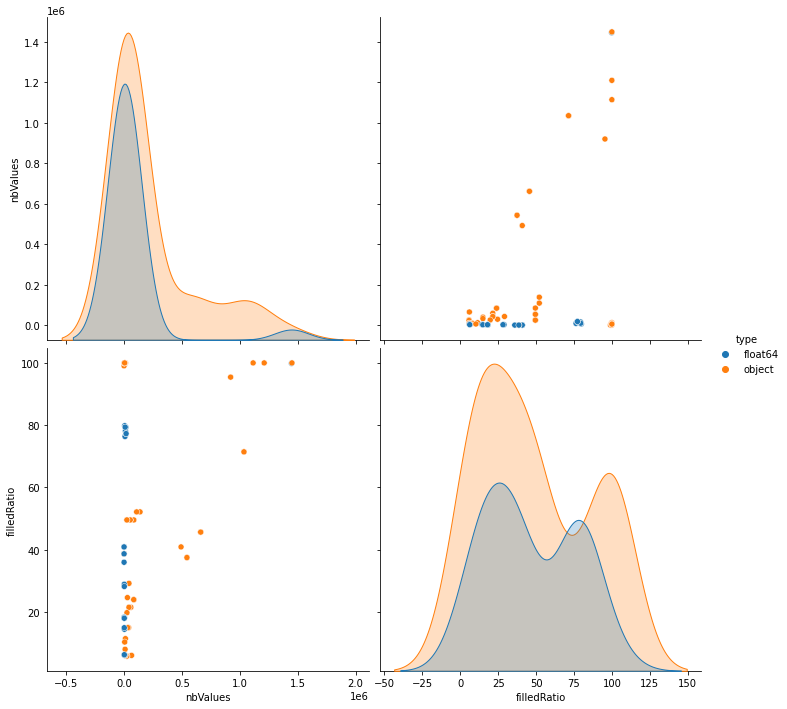

In [39]:
#we are espacially interested by variables with higher filled ratios > 70%
#let's filter it 
ColumnsFilledRatioFrameFiltered = ColumnsFilledRatioFrame[ColumnsFilledRatioFrame["filledRatio"] > 30]
#let's visualize it 
sns.pairplot(ColumnsFilledRatioFrame, hue="type", height=5)

In [51]:
#GET the columns list to drop 
ColumnsFilledRatioFrameFiltered = ColumnsFilledRatioFrame[ColumnsFilledRatioFrame["filledRatio"] < 38]
list(ColumnsFilledRatioFrameFiltered["column"])
cleanLightDF = cleanDF.drop(columns=list(ColumnsFilledRatioFrameFiltered["column"]))

Regardons la distribution des données de nutriscore 

In [52]:
#we now have exploitable data to look at
nutritionScore = ColumnsFilledRatioFrame[ColumnsFilledRatioFrame["column"] == "nutriscore_score"]
ColumnsFilledRatioFrame
#see the minimum value of score 
print(np.unique(cleanLightDF["nutriscore_score"].values))


[-15. -14. -13. ...  nan  nan  nan]


Elles sont comprises entre -15 et 40 avec certaines valeurs à "nan"

### par souci de lisibilité nous allons remplacé Nan par 100

In [57]:
cleanLightDF["nutriscore_score"] = cleanLightDF["nutriscore_score"].replace(np.nan, 100)
print(np.unique(cleanLightDF["nutriscore_score"].values))


[-15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.
  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
 100.]


### Regardons le dataset en ne gardans que les objets ayant un nutriscore. 

In [58]:
## Etape inutile en utilisant sample à partir du dataframe

cleanLightDFWithScore = cleanLightDF[cleanLightDF["nutriscore_score"] >= -15]
cleanLightDFWithScore = cleanLightDFWithScore[cleanLightDFWithScore["nutriscore_score"] < 100]
sample = np.random.randint(560417, size=100000)
print(cleanLightDFWithScore.shape)
sampledData = cleanLightDFWithScore.sort_index().iloc[list(sample)]
print(sampledData.shape)
#sns.pairplot(sampledData, height=5, diag_kind="hist")
#cleanLightDFWithScore.to_csv("../DataSet/cleanLightDFWithScore.csv")

(560417, 41)
(100000, 41)


##### Obesrvons à l'aide de Seaborn les dimensions ayant des variables vides dans le dataset traités. 

<AxesSubplot:>

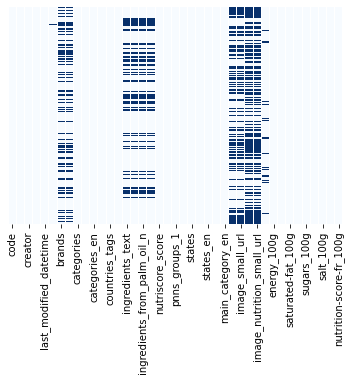

In [59]:
sns.heatmap(cleanLightDFWithScore.isnull(), yticklabels = False, cbar = False, cmap="Blues")


### Même approche avec le dataset filtré sur les datas n'ayant pas de nutriscore

In [60]:
## Etape inutile en utilisant sample à partir du dataframe
cleanLightDF.columns
cleanLightDFWithOutScore = cleanLightDF[cleanLightDF["nutriscore_score"] == 100]
#sample = np.random.randint(560417, size=100000)
print(cleanLightDFWithOutScore.shape)
#sampledData = cleanLightDFWithOutScore.sort_index().iloc[list(sample)]
#print(sampledData.shape)
#sns.pairplot(sampledData, height=5, diag_kind="hist")
#cleanLightDFWithScore.to_csv("../DataSet/cleanLightDFWithScore.csv")

(889398, 41)


<AxesSubplot:>

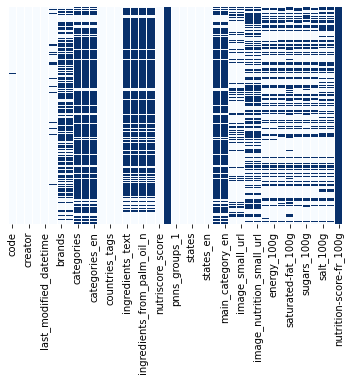

In [62]:
sns.heatmap(cleanLightDFWithOutScore.isnull(), yticklabels = False, cbar = False, cmap="Blues")

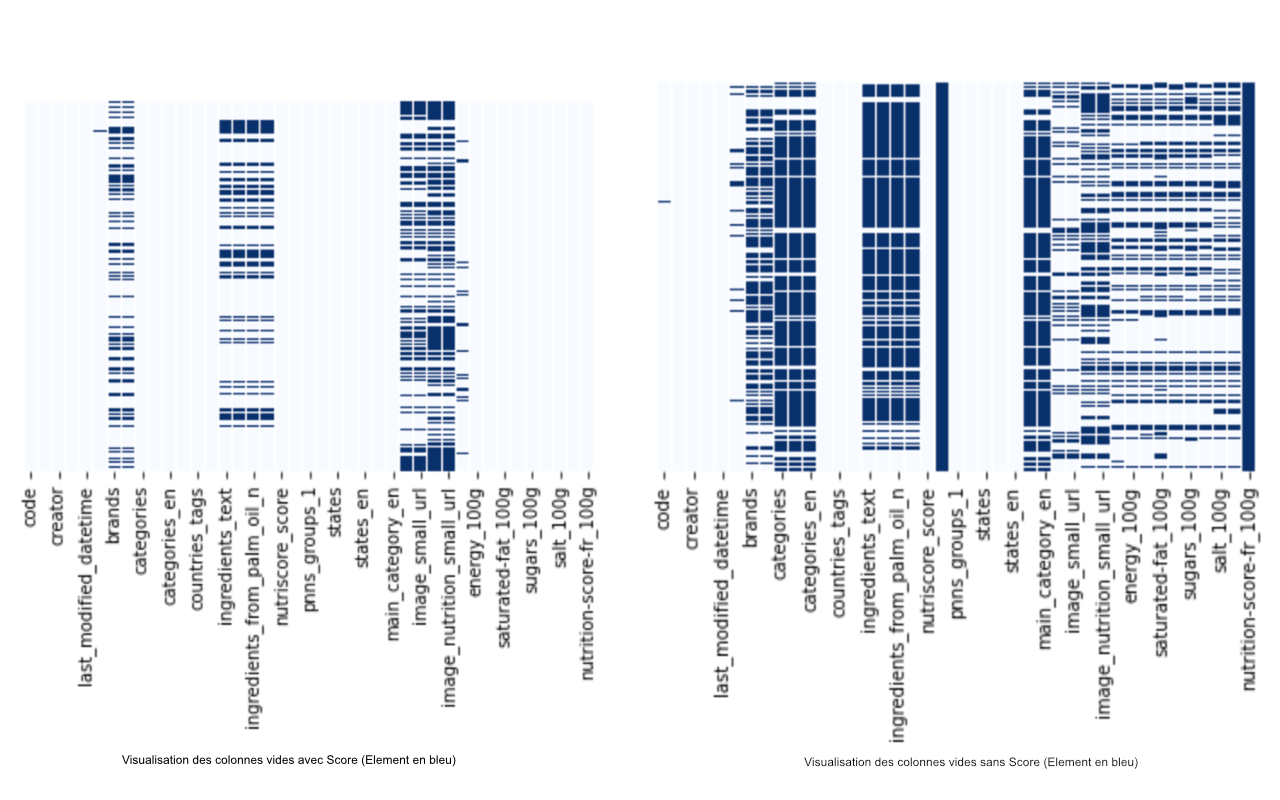

##### On constate visuellement que le dataset filtré avec des éléments ayant un score est beaucoup moins impactés par des lignes vides (sur la gauche et en bleu)
##### En revanche le dataset avec des éléments n'ayant pas de score sont extrement impactés par des éléments vides. 

Nous allons donc garder uniquement les éléments ayant un nutriscore_score afin de pouvoir travailler sur un maximum d'éléments. 

Le dataset est beaucoup plus gros avec un nutriscore à Nan ou 100 
<br/>Près de 900k rows

#### Nous allons maintenant exporter un dataset ayant des dimensions remplis avec un score pour avant de passer à l'étape d'exploration ainsi que le dataframe utilisé pour le filtre

Dernière étape avant l'export le cleaning des colonnes qui ne sont pas d'un type float ou int

In [75]:
ColumnsFilledRatioFrame[ColumnsFilledRatioFrame["type"] == "object"].sort_values(by=["filledRatio"], ascending=False)

,column,nbValues,type,filledRatio
1,url,1449814,object,100.000
3,created_datetime,1210050,object,100.000
4,last_modified_datetime,1114475,object,100.000
2,creator,11803,object,100.000
45,states_en,4986,object,99.999
44,states_tags,4986,object,99.999
43,states,4985,object,99.999
42,pnns_groups_2,46,object,99.941
24,countries,9072,object,99.690
26,countries_en,3533,object,99.690


Concentrons nous sur les colonnes les plus remplis et qui nous permettrons de trier les produits comme brands ou producte_name ou pnns qui est très complet et est contient peu de valeurs distinctes

In [81]:
stringColumnsToClean = ["brands", "pnns_groups_2", "pnns_groups_1", "product_name", "countries"]

for col in stringColumnsToClean:
    cleanLightDFWithScore[col] = cleanLightDFWithScore[col].str.lower()
    cleanLightDFWithScore[col] = cleanLightDFWithScore[col].str.strip()
    cleanLightDFWithScore[col] = cleanLightDFWithScore[col].replace("é", "e")
    cleanLightDFWithScore[col] = cleanLightDFWithScore[col].replace("è", "e")
    cleanLightDFWithScore[col] = cleanLightDFWithScore[col].replace("à", "a")
    cleanLightDFWithScore[col] = cleanLightDFWithScore[col].replace("-", " ")

In [83]:
### mise à jour du dataframe de triage

nbValues = []
filledRatio = []
columns = []
ColumnsFilledRatio = pd.DataFrame(columns=list(cleanLightDFWithScore.columns), index=["nbValues", "filledRatio"])
for col in cleanLightDFWithScore.columns: 
    columns.append({"column": col, "nbValues": cleanLightDFWithScore[col].nunique(), "type": str(cleanLightDFWithScore[col].dtypes),"filledRatio": round((cleanLightDFWithScore[col].count()/cleanLightDFWithScore.shape[0])*100, 3)})
    nbValues.append(cleanLightDFWithScore[col].nunique())
    filledRatio.append(round((cleanLightDFWithScore[col].count()/cleanLightDFWithScore.shape[0])*100, 3))
ColumnsFilledRatio.append(nbValues)
ColumnsFilledRatio.append(filledRatio)
ColumnsFilledRatio
ColumnsFilledRatioFrame = pd.DataFrame(columns)

ColumnsFilledRatioFrame[ColumnsFilledRatioFrame["type"] == "object"].sort_values(by=["filledRatio", "nbValues"], ascending=False)

,column,nbValues,type,filledRatio
1,url,560416,object,100.000
3,created_datetime,404644,object,100.000
4,last_modified_datetime,370398,object,100.000
25,main_category,17876,object,100.000
2,creator,7159,object,100.000
23,states_tags,1708,object,100.000
24,states_en,1708,object,100.000
22,states,1707,object,100.000
21,pnns_groups_2,41,object,100.000
19,nutriscore_grade,5,object,100.000


In [ ]:
cleanLightDFWithScore.to_csv("../Projet Final/DataSet/cleanLightDFWithScore.csv", index= False)
ColumnsFilledRatioFrame.to_csv("../Projet Final/DataSet/ColumnsFilledRatioFrame.csv", index=False)

In [ ]:
#cleanLightDFWithScore.shape
ColumnsFilledRatioFrame.shape

#### verification de la forme des dataframes exportés. 

cleanLightDFWithScore a une shape de 560417 rows et 41 colonnes
ColumnsFilledRatioFrame a une shape de 74 rows et 4 colonnes

### Go to PSanté_02_notebook_exploration for Exploration